# MA Strategy with Regime/Trend Detection Filter Using the ADX
Average Directional Movement Index (ADX)

In [2]:
# auto reload
%load_ext autoreload
%autoreload 2

# Imports
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import core_metrics, file_exports, strategies

In [3]:
from strategies import ma_regime_detection

In [4]:
# running the strategy
# constants
investment_amount = 10000
test_data = pd.read_csv("../data/processed/training_data_70.csv")
short_ma = 20
long_ma = 50
adx_cutoff = 20
result = ma_regime_detection(investment_amount, test_data, short_ma, long_ma, adx_cutoff, transaction_costs=0.001, slippage=0.0005)

In [5]:
result.tail()

,Open,High,Low,Close,Volume,MA_short,MA_long,+DM,-DM,TR,...,position,trade_cost,market_ret,strategy_ret,strategy_ret_net,market_ret_net,cumulative_market,cumulative_strategy,portfolio_value,market_portfolio_value
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,374.407243,378.114230,371.691310,377.771179,78740100,395.322696,381.919351,0.000000,4.764739,6.422920,...,0.0,0.0,0.003138,0.003138,0.003138,0.003138,2.214502,1.558896,15588.957853,22145.024005
2022-09-02,381.449500,382.669283,371.967569,373.787720,99632100,394.311128,382.189609,4.555053,0.000000,10.701714,...,0.0,0.0,-0.010545,-0.010545,-0.010545,-0.010545,2.191151,1.542458,15424.577971,21911.512793
2022-09-06,374.635883,375.579301,370.147465,372.377380,76637400,393.251915,382.202568,0.000000,1.820104,5.431836,...,0.0,0.0,-0.003773,-0.003773,-0.003773,-0.003773,2.182884,1.536638,15366.379458,21828.838411
2022-09-07,372.062901,379.839031,371.843739,379.067139,70964200,392.605333,382.377722,4.259730,0.000000,7.995292,...,0.0,0.0,0.017965,0.017965,0.017965,0.017965,2.222099,1.564244,15642.436410,22220.993415
2022-09-08,376.789646,382.002292,375.579372,381.544891,80821700,391.670963,382.753760,2.163261,0.000000,6.422920,...,0.0,0.0,0.006536,0.006536,0.006536,0.006536,2.236624,1.574468,15744.682384,22366.239785


In [6]:
# export as csv in the data file
csv_name = "ma_trend_detection.csv"
output_folder = "../data/strategy_results/"

from file_exports import export_file
export_file(csv_name, output_folder, result)

Exported data as file ../data/strategy_results/ma_trend_detection.csv successfully.


In [7]:
# prelim test on final strategy portfolio value given varying threshold levels
thresholds = [10, 15, 20, 25, 30, 40]
for t in thresholds:
    res = ma_regime_detection(investment_amount, test_data, short_ma, long_ma, t, transaction_costs=0.001, slippage=0.0005)
    print(f"ADX cutoff = {t}, final value = {res['portfolio_value'].iloc[-1]}")

ADX cutoff = 10, final value = 17372.859474508765
ADX cutoff = 15, final value = 17488.721543131716
ADX cutoff = 20, final value = 15744.68238407542
ADX cutoff = 25, final value = 11410.292255765104
ADX cutoff = 30, final value = 11119.739231738698
ADX cutoff = 40, final value = 10129.571025856807


## Core Performance Metrics
To evaluate the basline strategy, we will perform the following tests.


### 1. Profit & Loss Metrics
Let's examine the returns and P&L of the strategy and market portfolios, considering transaction cost and slippage amounts as defined above.

Final portfolio value: 15744.68238407542 on 2022-09-08 00:00:00
Strategy returned 57.44682384075421% from 2015-01-02 00:00:00 to 2022-09-08 00:00:00
Market returned 123.66239785226219 from 2015-01-02 00:00:00 to 2022-09-08 00:00:00

Annualized across 7.6824 years: 
MA Strategy with Trend Detection returned 6.0866% per year
Buy & Hold the market returned 11.0467% per year


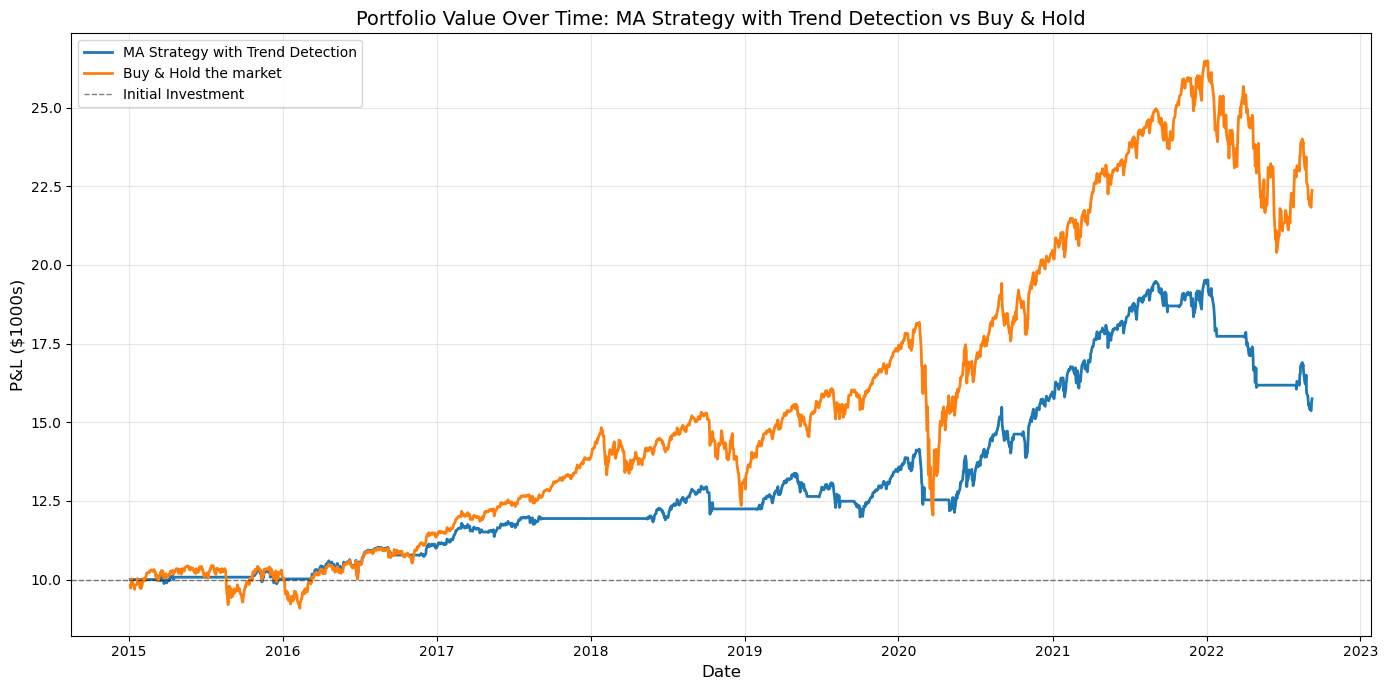

In [8]:
from core_metrics import pnl

graph_title = 'Portfolio Value Over Time: MA Strategy with Trend Detection vs Buy & Hold'
strategy_name = "MA Strategy with Trend Detection"
benchmark_name = "Buy & Hold the market"

result, strategy_annual_return, market_annual_return = pnl(result, investment_amount, strategy_name, benchmark_name, graph_title)

### 2. Performance Ratios

In [9]:
from core_metrics import performance_ratios

perf_ratios = performance_ratios(result)

print("WITHOUT transaction costs...")
print(f"Sharpe Ratio: {perf_ratios['sharpe ratio']}")
print(f"Information Ratio: {perf_ratios['information ratio']}")
print(f"Sortino Ratio: {perf_ratios['sortino ratio']} \n")

print("WITH transaction costs...")
print(f"Sharpe Ratio: {perf_ratios['sharpe with costs']}")
print(f"Information Ratios: {perf_ratios['information ratio with costs']}")
print(f"Sortino Ratio: {perf_ratios['sortino ratio with costs']}")


WITHOUT transaction costs...
Sharpe Ratio: 0.4345456170940546
Information Ratio: 9.280265125688182
Sortino Ratio: 7.203393652626529 

WITH transaction costs...
Sharpe Ratio: 0.37835626636858827
Information Ratios: 9.274683329404924
Sortino Ratio: 6.264784473703084


In [10]:
from core_metrics import risk_metrics

risks = risk_metrics(result)
print(f"Max Drawdown: {(100 * risks['max_drawdown']):.2f}%")
print(f"Average Drawdown: {(100 * risks['avg_drawdown']):.2f}%")
print(f"Max Drawdown Duration: {(risks['max_dd_duration']):.2f} days")
print(f"Average Drawdown Duration: {(risks['avg_dd_duration']):.2f} days")
print(f"Volatility: {(100 * risks['volatility']):.2f}%")

Max Drawdown: -21.30%
Average Drawdown: -3.15%
Max Drawdown Duration: 197.00 days
Average Drawdown Duration: 16.59 days
Volatility: 10.78%


### 4. Trade Statistics

In [15]:
from core_metrics import trade_statistics

trade_stats = trade_statistics(result)
print(f"Total Number of Trades: {(result['position'] != 0).sum()}")
print(f"Average Holding Periods: {trade_stats['avg_holding_period']}")
print(f"Win Rate: {trade_stats['win_rate']}")
print(f"Win-Loss Ratio: {trade_stats['win_loss_ratio']}")
print(f"Profit Factor (gross profit/gross loss): {trade_stats['profit_factor']}")


Total Number of Trades: 30
Average Holding Periods: 119.71428571428571
Win Rate: 0.7142857142857143
Win-Loss Ratio: inf
Profit Factor (gross profit/gross loss): 4.997097921042294


### 5. Strategy Beta to Benchmark

In [12]:
from core_metrics import find_alpha, calmar_ratio, find_beta

beta = find_beta(result, result.index[0], result.index[-1])
print(f'Beta: {beta}')
alpha = find_alpha(result, strategy_annual_return, market_annual_return)
print(f'Alpha: {alpha}')
calmar = calmar_ratio(strategy_annual_return, risks['max_drawdown'])
print(f'Calmar Ratio: {calmar:.2f}')

Beta: 0.34604903764923445
Alpha: 0.009513162763370012
Calmar Ratio: 0.29


### 5. Consistency of Returns

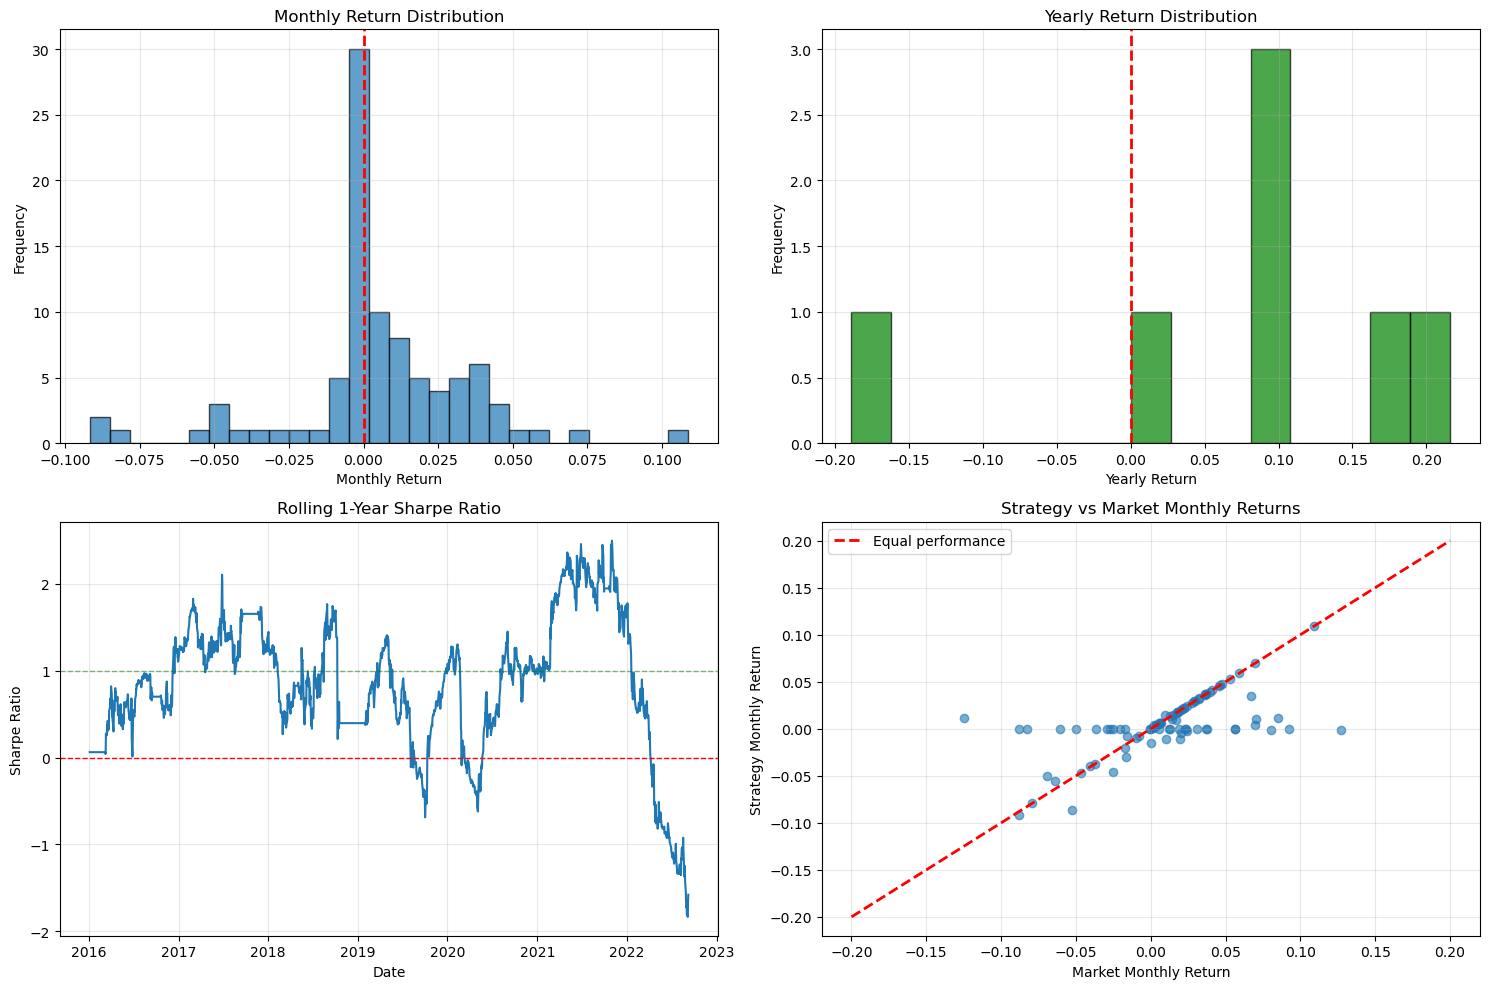

Percentage of Positive Months: 50.54%
Average Monthly Return: 0.54%
Median Monthly Return: 0.12%
Standard Deviation of Monthly Returns: 3.02%
Percentage of Positive Years: 75.00%
Average Yearly Return: 7.45%
Median Yearly Return: 9.71%


In [13]:
from core_metrics import consistency

window = 252 # trading days (for rolling sharpe)
consistency = consistency(result, window)

print(f"Percentage of Positive Months: {consistency['pct_positive_months']:.2%}")
print(f"Average Monthly Return: {consistency['avg_monthly_return']:.2%}")
print(f"Median Monthly Return: {consistency['median_monthly_return']:.2%}")
print(f"Standard Deviation of Monthly Returns: {consistency['std_monthly_return']:.2%}")

print(f"Percentage of Positive Years: {consistency['pct_positive_years']:.2%}")
print(f"Average Yearly Return: {consistency['avg_yearly_return']:.2%}")
print(f"Median Yearly Return: {consistency['median_yearly_return']:.2%}")


### 6. Sensitivity of Returns to Transaction Costs

/Users/lijing/Desktop/Personal/Coding/Quant/02-moving-avg-backtest/notebooks/../src/core_metrics.py:448: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0, 0].set_ylim(get_lims(results_df['total_return'] * 100))
/Users/lijing/Desktop/Personal/Coding/Quant/02-moving-avg-backtest/notebooks/../src/core_metrics.py:451: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0, 1].set_ylim(get_lims(results_df['annualized_return'] * 100))
/Users/lijing/Desktop/Personal/Coding/Quant/02-moving-avg-backtest/notebooks/../src/core_metrics.py:454: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1, 0].set_ylim(get_lims(results_df['sharpe_ratio']))
/Users/lijing/Desktop/Personal/Coding/Quant/02-moving-avg-backtest/notebooks/../src/core_metrics.py:457: UserWarning: Attempting to set iden

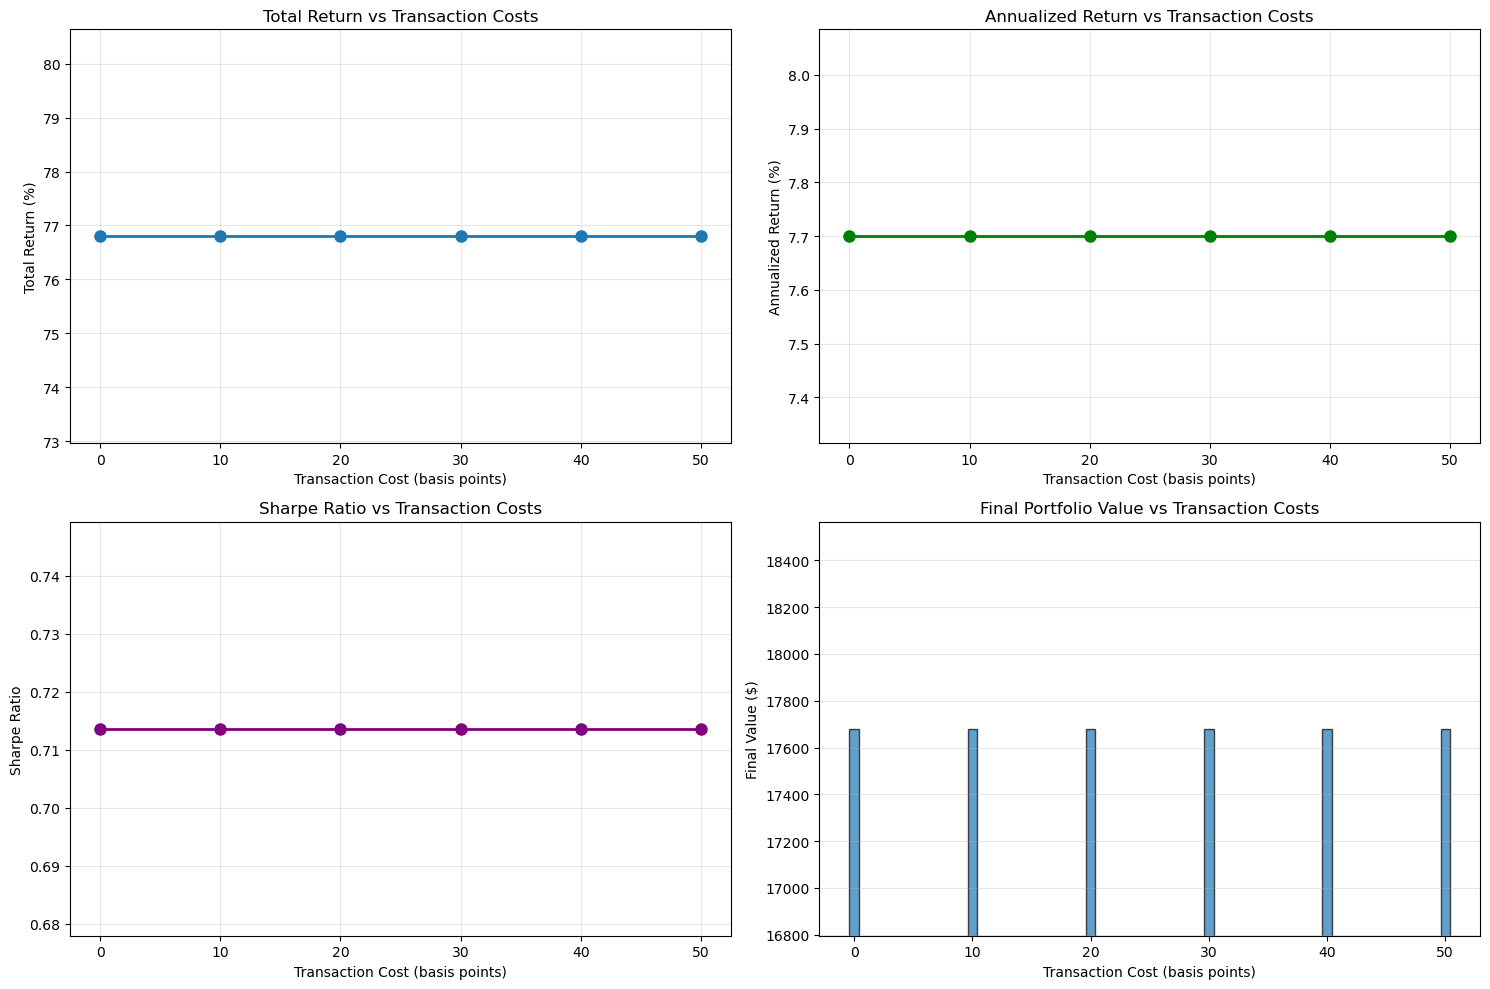

Transaction Cost Sensitivity Analysis
 cost_bps  cost_pct  total_return  annualized_return  sharpe_ratio  final_value
      0.0       0.0      0.767998           0.076996       0.71365 17679.977443
     10.0       0.1      0.767998           0.076996       0.71365 17679.977443
     20.0       0.2      0.767998           0.076996       0.71365 17679.977443
     30.0       0.3      0.767998           0.076996       0.71365 17679.977443
     40.0       0.4      0.767998           0.076996       0.71365 17679.977443
     50.0       0.5      0.767998           0.076996       0.71365 17679.977443


Strategy remains profitable at all tested cost levels


In [14]:
from core_metrics import sensitivity

prices_data = pd.read_csv("../data/processed/training_data_70.csv")

def ma_volatility_filter_helper(investment_amount, test_data, short_ma, long_ma, transaction_costs=0.001, slippage=0.0005):
    res = ma_regime_detection(investment_amount, test_data, short_ma, long_ma, transaction_costs, slippage)
    return res
df = sensitivity(ma_volatility_filter_helper, investment_amount, prices_data, short_ma, long_ma)